In [1]:
import pandas as pd
import numpy as np
import csv
import datetime
import matplotlib.pyplot as plt

In [2]:
#with open('weather_file.xlsx','r') as f:
#    reader = csv.reader(f)

In [3]:
df = pd.read_csv('weather_file.csv')
df.head()

,X,year,month,measure,X1,X2,X3,X4,X5,X6,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
0,1,2014,12,Max.TemperatureF,64,42,51,43,42,45,...,44,47,46,59,50,52,52,41,30,30
1,2,2014,12,Mean.TemperatureF,52,38,44,37,34,42,...,39,45,44,52,44,45,46,36,26,25
2,3,2014,12,Min.TemperatureF,39,33,37,30,26,38,...,33,42,41,44,37,38,40,30,22,20
3,4,2014,12,Max.Dew.PointF,46,40,49,24,37,45,...,39,45,46,58,31,34,42,26,10,8
4,5,2014,12,MeanDew.PointF,40,27,42,21,25,40,...,34,42,44,43,29,31,35,20,4,5


In [4]:
df.shape

(264, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 35 columns):
X          264 non-null int64
year       264 non-null int64
month      264 non-null int64
measure    264 non-null object
X1         259 non-null object
X2         257 non-null object
X3         260 non-null object
X4         257 non-null object
X5         256 non-null object
X6         255 non-null object
X7         257 non-null object
X8         258 non-null object
X9         259 non-null object
X10        259 non-null object
X11        258 non-null object
X12        258 non-null object
X13        255 non-null object
X14        257 non-null object
X15        258 non-null object
X16        256 non-null object
X17        256 non-null object
X18        258 non-null object
X19        256 non-null object
X20        256 non-null object
X21        259 non-null object
X22        261 non-null object
X23        256 non-null object
X24        257 non-null object
X25        258 non-null object

In [6]:
melt_df = df.melt(id_vars=['X ', 'year ', 'month','measure'], var_name='Day',value_name='measure_value')
melt_df.rename(columns={'X ': 'X', 'year ': 'year'}, inplace=True)

In [7]:
melt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8184 entries, 0 to 8183
Data columns (total 6 columns):
X                8184 non-null int64
year             8184 non-null int64
month            8184 non-null int64
measure          8184 non-null object
Day              8184 non-null object
measure_value    7983 non-null object
dtypes: int64(3), object(3)
memory usage: 383.7+ KB


In [8]:
melt_df['Day'] = pd.to_numeric(melt_df.Day.str[1:])

In [9]:
melt_df['date'] = melt_df["year"].map(str) + "-" + melt_df["month"].map(str) + "-" + melt_df["Day"].map(str)

In [10]:
melt_df['date'] = pd.to_datetime(melt_df['date'], errors='coerce')

In [11]:
melt_df[pd.isnull(melt_df['date'])]

,X,year,month,measure,Day,measure_value,date
7436,45,2015,2,Max.TemperatureF,29,<NA>,NaT
7437,46,2015,2,Mean.TemperatureF,29,<NA>,NaT
7438,47,2015,2,Min.TemperatureF,29,<NA>,NaT
7439,48,2015,2,Max.Dew.PointF,29,<NA>,NaT
7440,49,2015,2,MeanDew.PointF,29,<NA>,NaT
7441,50,2015,2,Min.DewpointF,29,<NA>,NaT
7442,51,2015,2,Max.Humidity,29,<NA>,NaT
7443,52,2015,2,Mean.Humidity,29,<NA>,NaT
7444,53,2015,2,Min.Humidity,29,<NA>,NaT
7445,54,2015,2,Max.Sea.Level.PressureIn,29,<NA>,NaT


In [12]:
# 153 rows are not valid. So should be dropped
melt_df1 = melt_df[pd.notnull(melt_df['date'])]
melt_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8030 entries, 0 to 8161
Data columns (total 7 columns):
X                8030 non-null int64
year             8030 non-null int64
month            8030 non-null int64
measure          8030 non-null object
Day              8030 non-null int64
measure_value    7829 non-null object
date             8030 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 501.9+ KB


In [13]:
melt_df2 = melt_df1[['X','date','measure','measure_value']]
melt_df2.reset_index(inplace=True)

In [14]:
melt_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8030 entries, 0 to 8029
Data columns (total 5 columns):
index            8030 non-null int64
X                8030 non-null int64
date             8030 non-null datetime64[ns]
measure          8030 non-null object
measure_value    7829 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 313.8+ KB


In [15]:
pivot_df = melt_df2.pivot( index='date',columns='measure', values='measure_value')

In [16]:
pivot_df.head(5)

measure,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Humidity,...,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees
date,,,,,,,,,,,,,,,,,,,,,
2014-12-01,6,Rain,46,29,74,30.45,64,10,22,63,...,10,13,40,26,52,30.01,39,10,0.01,268
2014-12-02,7,Rain-Snow,40,29,92,30.71,42,10,24,72,...,8,15,27,17,51,30.4,33,2,0.1,62
2014-12-03,8,Rain,49,38,100,30.4,51,10,29,79,...,5,12,42,24,57,29.87,37,1,0.44,254
2014-12-04,3,NaN,24,33,69,30.56,43,10,25,54,...,10,12,21,13,39,30.09,30,10,0,292
2014-12-05,5,Rain,37,26,85,30.68,42,10,22,66,...,10,10,25,12,47,30.45,26,5,0.11,61


In [17]:
pivot_df1 = pivot_df.fillna(method= 'ffill')
pivot_df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2014-12-01 to 2015-11-30
Data columns (total 22 columns):
CloudCover                   365 non-null object
Events                       365 non-null object
Max.Dew.PointF               365 non-null object
Max.Gust.SpeedMPH            365 non-null object
Max.Humidity                 365 non-null object
Max.Sea.Level.PressureIn     365 non-null object
Max.TemperatureF             365 non-null object
Max.VisibilityMiles          365 non-null object
Max.Wind.SpeedMPH            365 non-null object
Mean.Humidity                365 non-null object
Mean.Sea.Level.PressureIn    365 non-null object
Mean.TemperatureF            365 non-null object
Mean.VisibilityMiles         365 non-null object
Mean.Wind.SpeedMPH           365 non-null object
MeanDew.PointF               365 non-null object
Min.DewpointF                365 non-null object
Min.Humidity                 365 non-null object
Min.Sea.Level.PressureIn     365 non-null o

In [18]:
pivot_df1[pivot_df1.columns.difference(['date', 'Events'])] = pivot_df1[pivot_df1.columns.difference(['date', 'Events'])].apply(lambda x: x.astype(np.float64, errors='ignore'), axis=0)
pivot_df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2014-12-01 to 2015-11-30
Freq: D
Data columns (total 22 columns):
CloudCover                   365 non-null float64
Events                       365 non-null object
Max.Dew.PointF               365 non-null float64
Max.Gust.SpeedMPH            365 non-null object
Max.Humidity                 365 non-null float64
Max.Sea.Level.PressureIn     365 non-null float64
Max.TemperatureF             365 non-null float64
Max.VisibilityMiles          365 non-null float64
Max.Wind.SpeedMPH            365 non-null float64
Mean.Humidity                365 non-null float64
Mean.Sea.Level.PressureIn    365 non-null float64
Mean.TemperatureF            365 non-null float64
Mean.VisibilityMiles         365 non-null float64
Mean.Wind.SpeedMPH           365 non-null float64
MeanDew.PointF               365 non-null float64
Min.DewpointF                365 non-null float64
Min.Humidity                 365 non-null float64
Min.Sea.Level.Pressu

In [19]:
pivot_df1['Max.Gust.SpeedMPH'] = pd.to_numeric(pivot_df1['Max.Gust.SpeedMPH'],errors='coerce')
pivot_df1['PrecipitationIn'] = pd.to_numeric(pivot_df1['PrecipitationIn'],errors='coerce')

In [20]:
pivot_df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2014-12-01 to 2015-11-30
Freq: D
Data columns (total 22 columns):
CloudCover                   365 non-null float64
Events                       365 non-null object
Max.Dew.PointF               365 non-null float64
Max.Gust.SpeedMPH            359 non-null float64
Max.Humidity                 365 non-null float64
Max.Sea.Level.PressureIn     365 non-null float64
Max.TemperatureF             365 non-null float64
Max.VisibilityMiles          365 non-null float64
Max.Wind.SpeedMPH            365 non-null float64
Mean.Humidity                365 non-null float64
Mean.Sea.Level.PressureIn    365 non-null float64
Mean.TemperatureF            365 non-null float64
Mean.VisibilityMiles         365 non-null float64
Mean.Wind.SpeedMPH           365 non-null float64
MeanDew.PointF               365 non-null float64
Min.DewpointF                365 non-null float64
Min.Humidity                 365 non-null float64
Min.Sea.Level.Press

In [21]:
pivot_df1 = pivot_df1.fillna(method= 'ffill')
pivot_df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2014-12-01 to 2015-11-30
Freq: D
Data columns (total 22 columns):
CloudCover                   365 non-null float64
Events                       365 non-null object
Max.Dew.PointF               365 non-null float64
Max.Gust.SpeedMPH            365 non-null float64
Max.Humidity                 365 non-null float64
Max.Sea.Level.PressureIn     365 non-null float64
Max.TemperatureF             365 non-null float64
Max.VisibilityMiles          365 non-null float64
Max.Wind.SpeedMPH            365 non-null float64
Mean.Humidity                365 non-null float64
Mean.Sea.Level.PressureIn    365 non-null float64
Mean.TemperatureF            365 non-null float64
Mean.VisibilityMiles         365 non-null float64
Mean.Wind.SpeedMPH           365 non-null float64
MeanDew.PointF               365 non-null float64
Min.DewpointF                365 non-null float64
Min.Humidity                 365 non-null float64
Min.Sea.Level.Press

In [46]:
%matplotlib inline
import seaborn as sns

In [101]:
def plot_daily_weekly_montly(df, col):
    df1 = pd.DataFrame()
    df1=df[col].resample('M').mean()
    plt.plot(df1)
    df1=df[col].resample('W').mean()
    plt.plot(df1)
    #plt.plot(df[col])
    plt.title('Variations of {}'.format(col))
    df1.plot(subplots=True, figsize=(10,50))
    plt.show()        

CloudCover


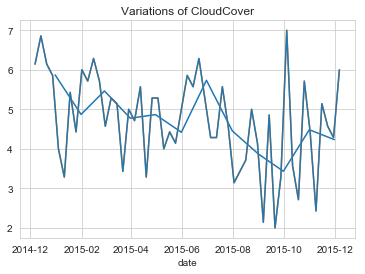

Max.Dew.PointF


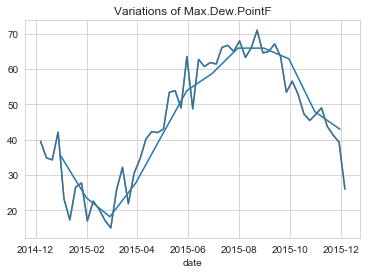

Max.Gust.SpeedMPH


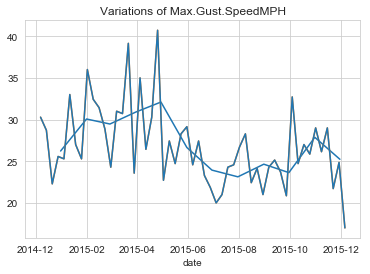

Max.Humidity


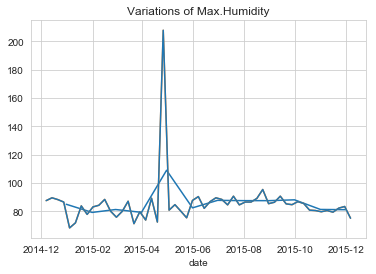

Max.Sea.Level.PressureIn


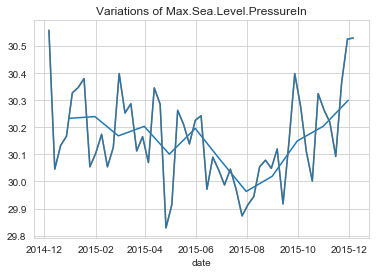

Max.TemperatureF


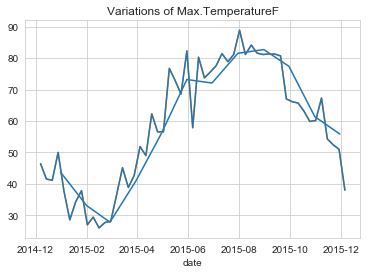

Max.VisibilityMiles


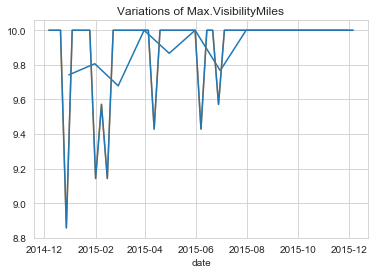

Max.Wind.SpeedMPH


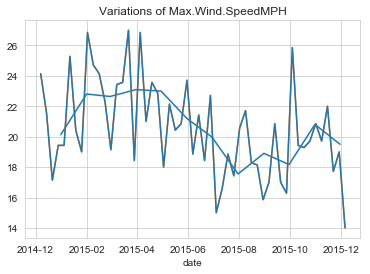

Mean.Humidity


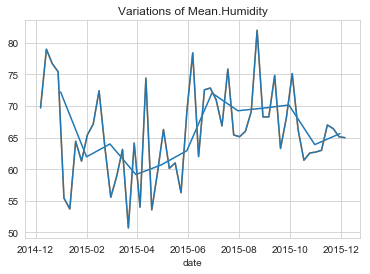

Mean.Sea.Level.PressureIn


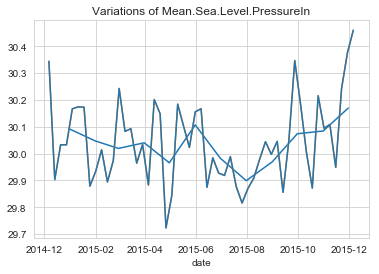

Mean.TemperatureF


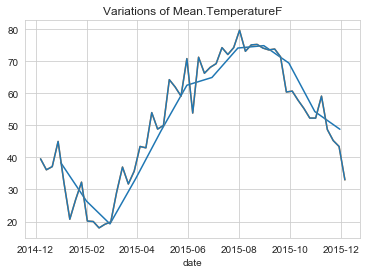

Mean.VisibilityMiles


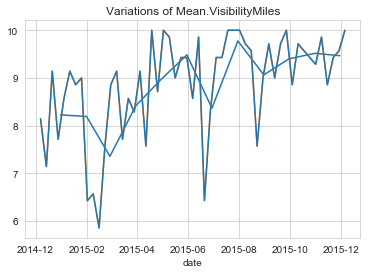

Mean.Wind.SpeedMPH


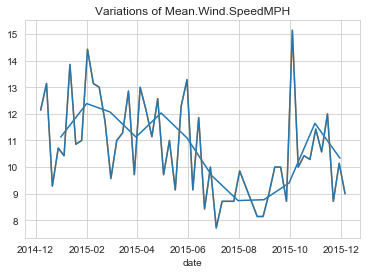

MeanDew.PointF


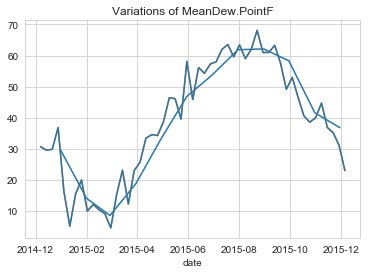

Min.DewpointF


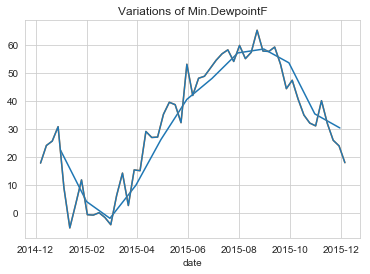

Min.Humidity


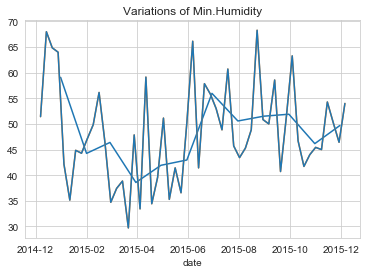

Min.Sea.Level.PressureIn


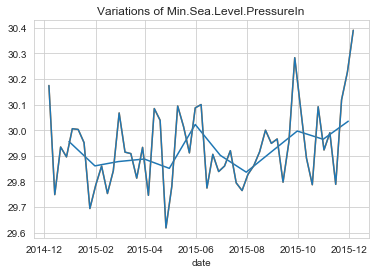

Min.TemperatureF


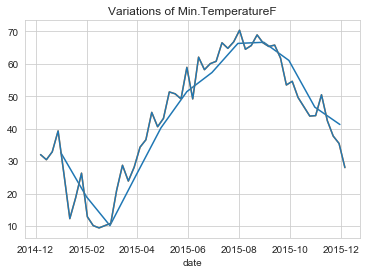

Min.VisibilityMiles


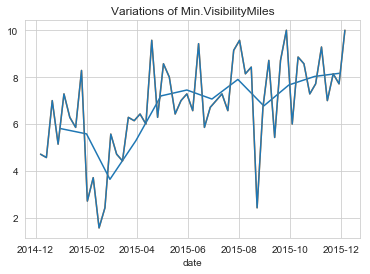

PrecipitationIn


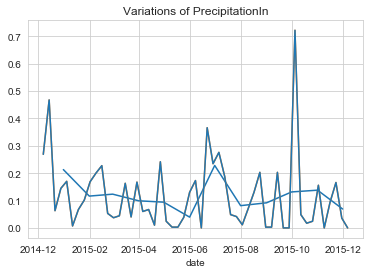

WindDirDegrees


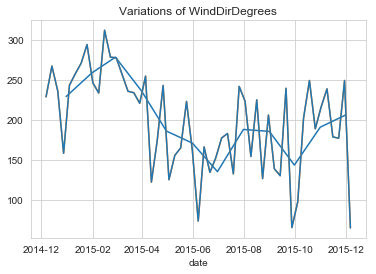

In [103]:
for col in pivot_df1.columns:
    if col == 'Events':
        continue
    print(col)
    plot_daily_weekly_montly(pivot_df1,col)
        


In [146]:
pd.Series(pivot_df1['Events']).value_counts()
events_unique = pivot_df1['Events'].unique().tolist()
events_unique

['Rain',
 'Rain-Snow',
 'Snow',
 'Fog-Rain',
 'Fog-Snow',
 'Fog-Rain-Snow',
 'Fog-Rain-Thunderstorm',
 'Fog',
 'Rain-Thunderstorm',
 'Thunderstorm',
 'Fog-Rain-Hail-Thunderstorm']

In [159]:
pivot_df1.groupby('Events')['WindDirDegrees'].mean()

Events
Fog                           123.444444
Fog-Rain                      208.000000
Fog-Rain-Hail-Thunderstorm    155.714286
Fog-Rain-Snow                 296.375000
Fog-Rain-Thunderstorm         171.400000
Fog-Snow                      282.400000
Rain                          183.554113
Rain-Snow                     223.000000
Rain-Thunderstorm             173.769231
Snow                          264.134615
Thunderstorm                  201.000000
Name: WindDirDegrees, dtype: float64

In [170]:
df_mean = pd.DataFrame()
temp_df = pd.DataFrame(pivot_df1.groupby('Events')['WindDirDegrees'].mean())
df_mean = temp_df.merge(df_mean, how='outer', left_index=True, right_index=True)
df_mean

,WindDirDegrees
Events,
Fog,123.444444
Fog-Rain,208.000000
Fog-Rain-Hail-Thunderstorm,155.714286
Fog-Rain-Snow,296.375000
Fog-Rain-Thunderstorm,171.400000
Fog-Snow,282.400000
Rain,183.554113
Rain-Snow,223.000000
Rain-Thunderstorm,173.769231


In [172]:
df_mean = pd.DataFrame()
for col in pivot_df1.columns:
    if col == 'Events':
        continue    
    temp_df = pd.DataFrame(pivot_df1.groupby('Events')[col].mean())
    df_mean = temp_df.merge(df_mean, how='outer', left_index=True, right_index=True)
df_mean    

,WindDirDegrees,PrecipitationIn,Min.VisibilityMiles,Min.TemperatureF,Min.Sea.Level.PressureIn,Min.Humidity,Min.DewpointF,MeanDew.PointF,Mean.Wind.SpeedMPH,Mean.VisibilityMiles,...,Mean.Sea.Level.PressureIn,Mean.Humidity,Max.Wind.SpeedMPH,Max.VisibilityMiles,Max.TemperatureF,Max.Sea.Level.PressureIn,Max.Humidity,Max.Gust.SpeedMPH,Max.Dew.PointF,CloudCover
Events,,,,,,,,,,,,,,,,,,,,,
Fog,123.444444,0.077778,3.333333,54.111111,30.025556,56.000000,49.333333,53.333333,9.555556,8.111111,...,30.125556,74.555556,18.555556,10.000000,70.000000,30.214444,92.555556,22.777778,57.666667,5.333333
Fog-Rain,208.000000,0.412308,3.846154,40.230769,29.735385,54.461538,30.000000,38.846154,11.153846,7.000000,...,29.935385,71.538462,21.461538,9.384615,57.461538,30.161538,88.307692,28.153846,47.769231,5.307692
Fog-Rain-Hail-Thunderstorm,155.714286,0.070000,8.571429,63.714286,29.892857,47.142857,54.857143,58.285714,8.857143,9.714286,...,29.938571,66.000000,21.428571,10.000000,80.142857,29.971429,84.571429,27.428571,62.428571,3.571429
Fog-Rain-Snow,296.375000,0.160000,5.000000,21.375000,29.678750,43.750000,7.000000,18.500000,12.000000,7.250000,...,29.832500,62.500000,23.250000,10.000000,37.125000,30.040000,80.625000,30.375000,26.250000,5.375000
Fog-Rain-Thunderstorm,171.400000,0.312000,4.000000,43.400000,29.844000,44.600000,30.200000,41.400000,11.200000,7.000000,...,29.936000,69.400000,23.200000,10.000000,58.200000,30.108000,273.600000,44.000000,49.400000,6.000000
Fog-Snow,282.400000,0.325000,2.700000,11.900000,29.722000,50.500000,-0.600000,10.500000,15.100000,5.300000,...,29.878000,68.800000,27.000000,8.800000,26.700000,30.071000,86.700000,36.500000,20.200000,5.800000
Rain,183.554113,0.115541,7.679654,50.281385,29.946883,49.298701,39.701299,45.696970,10.432900,9.255411,...,30.048528,66.675325,20.030303,9.952381,65.917749,30.153939,83.523810,25.835498,51.649351,4.584416
Rain-Snow,223.000000,0.105625,4.750000,24.937500,29.926875,40.312500,8.000000,18.250000,13.125000,8.375000,...,30.085000,59.437500,25.750000,10.000000,40.875000,30.240000,78.062500,34.000000,28.437500,5.062500
Rain-Thunderstorm,173.769231,0.056154,6.692308,66.615385,29.946154,52.000000,59.923077,63.153846,8.000000,9.461538,...,29.996923,70.153846,17.230769,10.000000,83.076923,30.046154,87.923077,22.076923,66.153846,3.692308


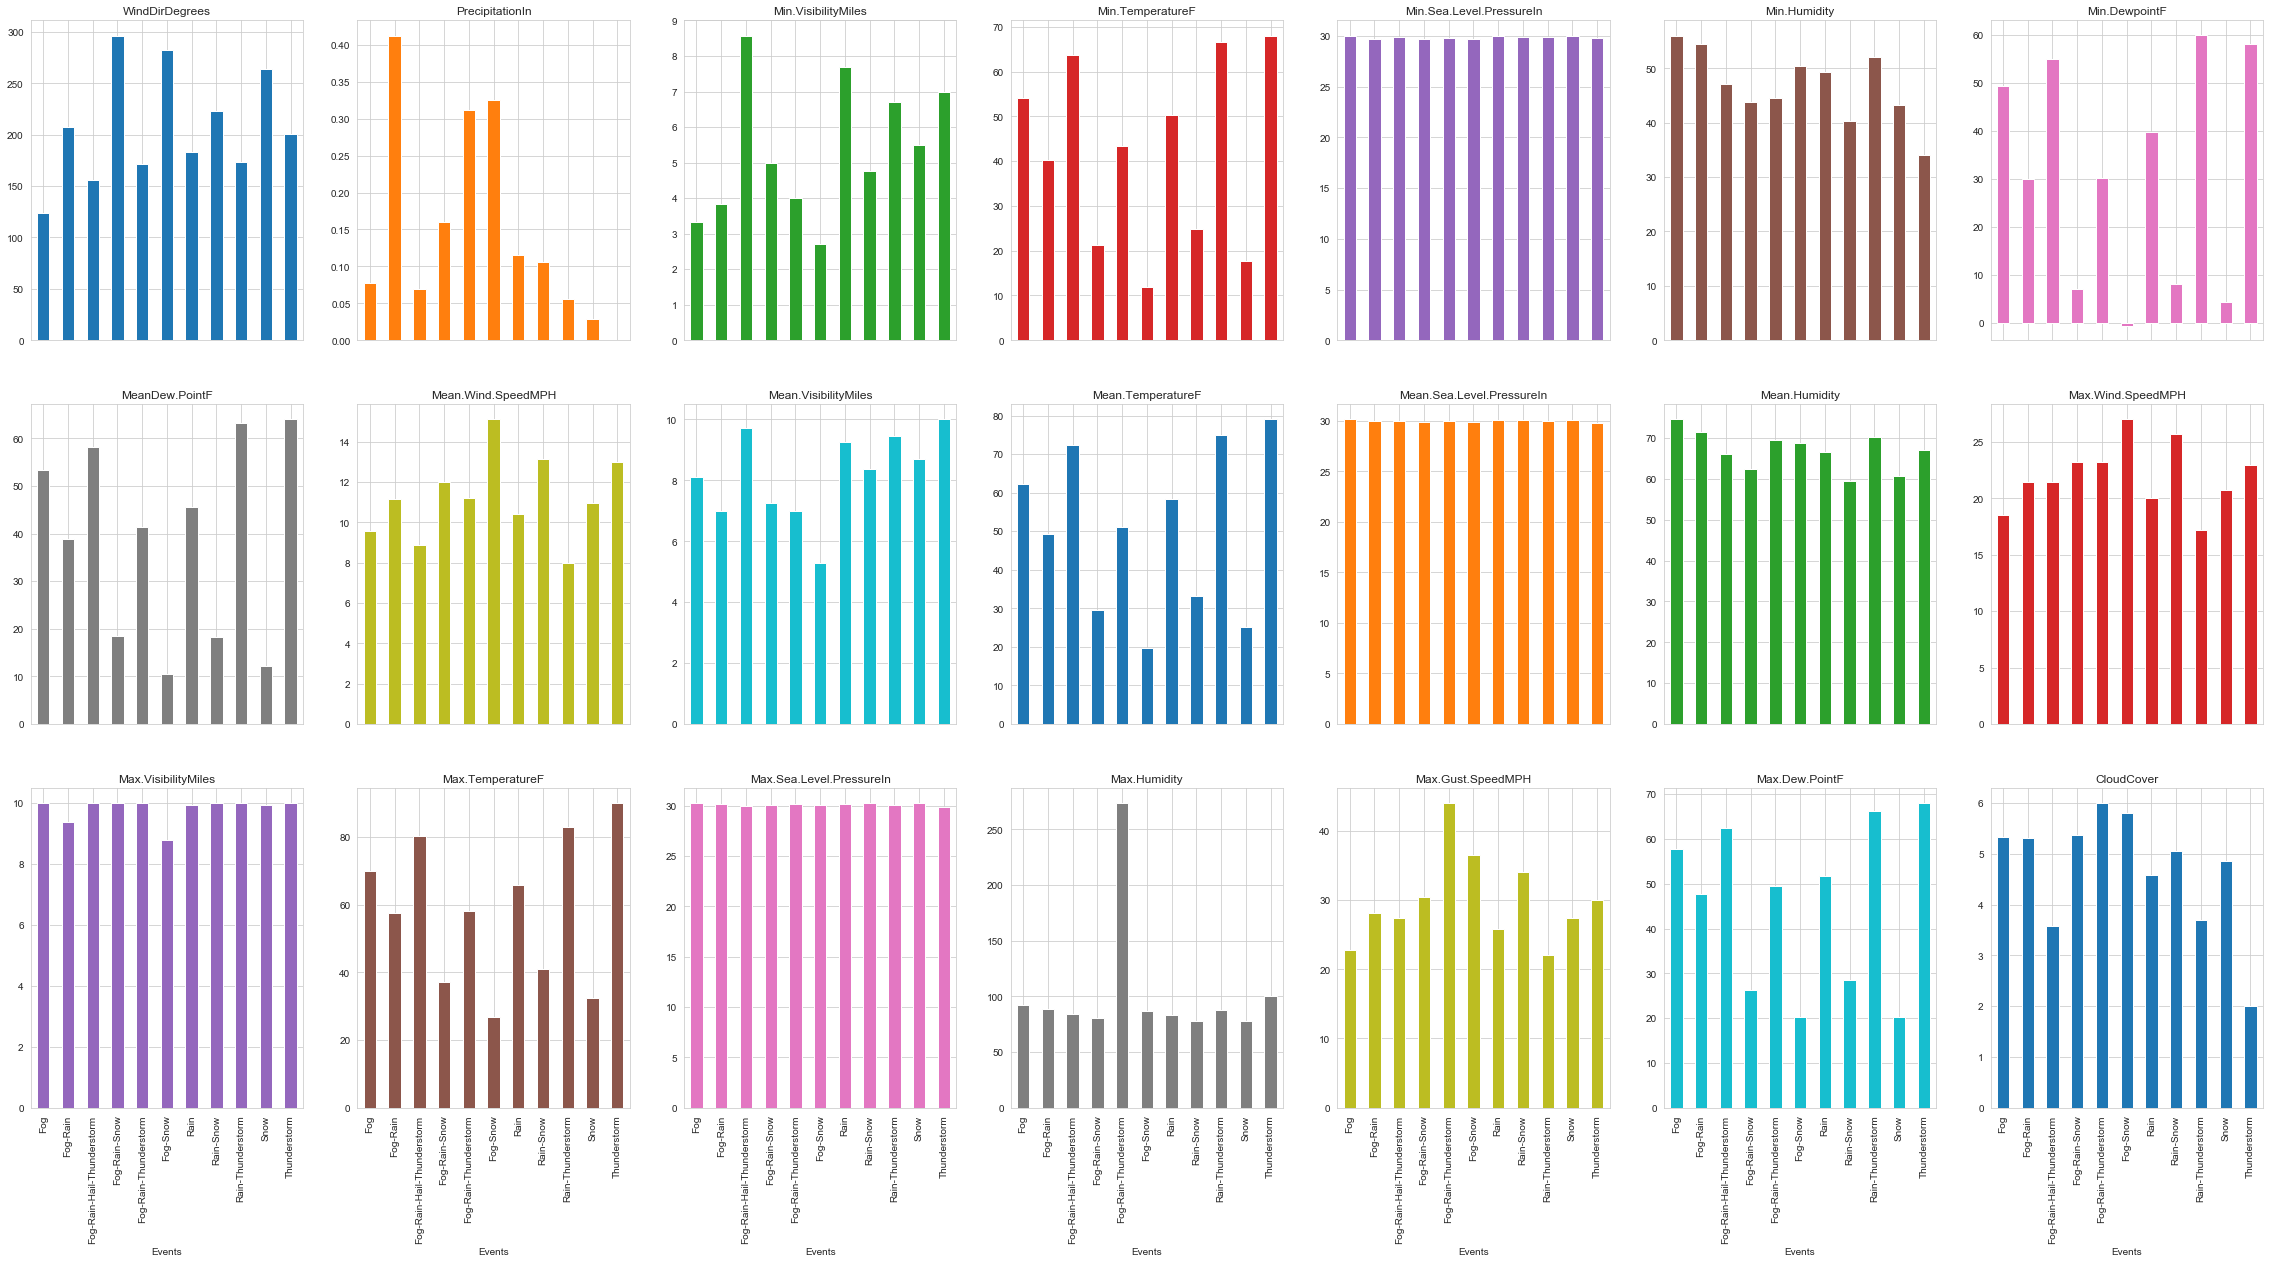

In [223]:
df_mean.plot(kind='bar',subplots=True,figsize=(40,20),layout=(3, 7),legend=False) 
plt.savefig('Mean_Plots.png')

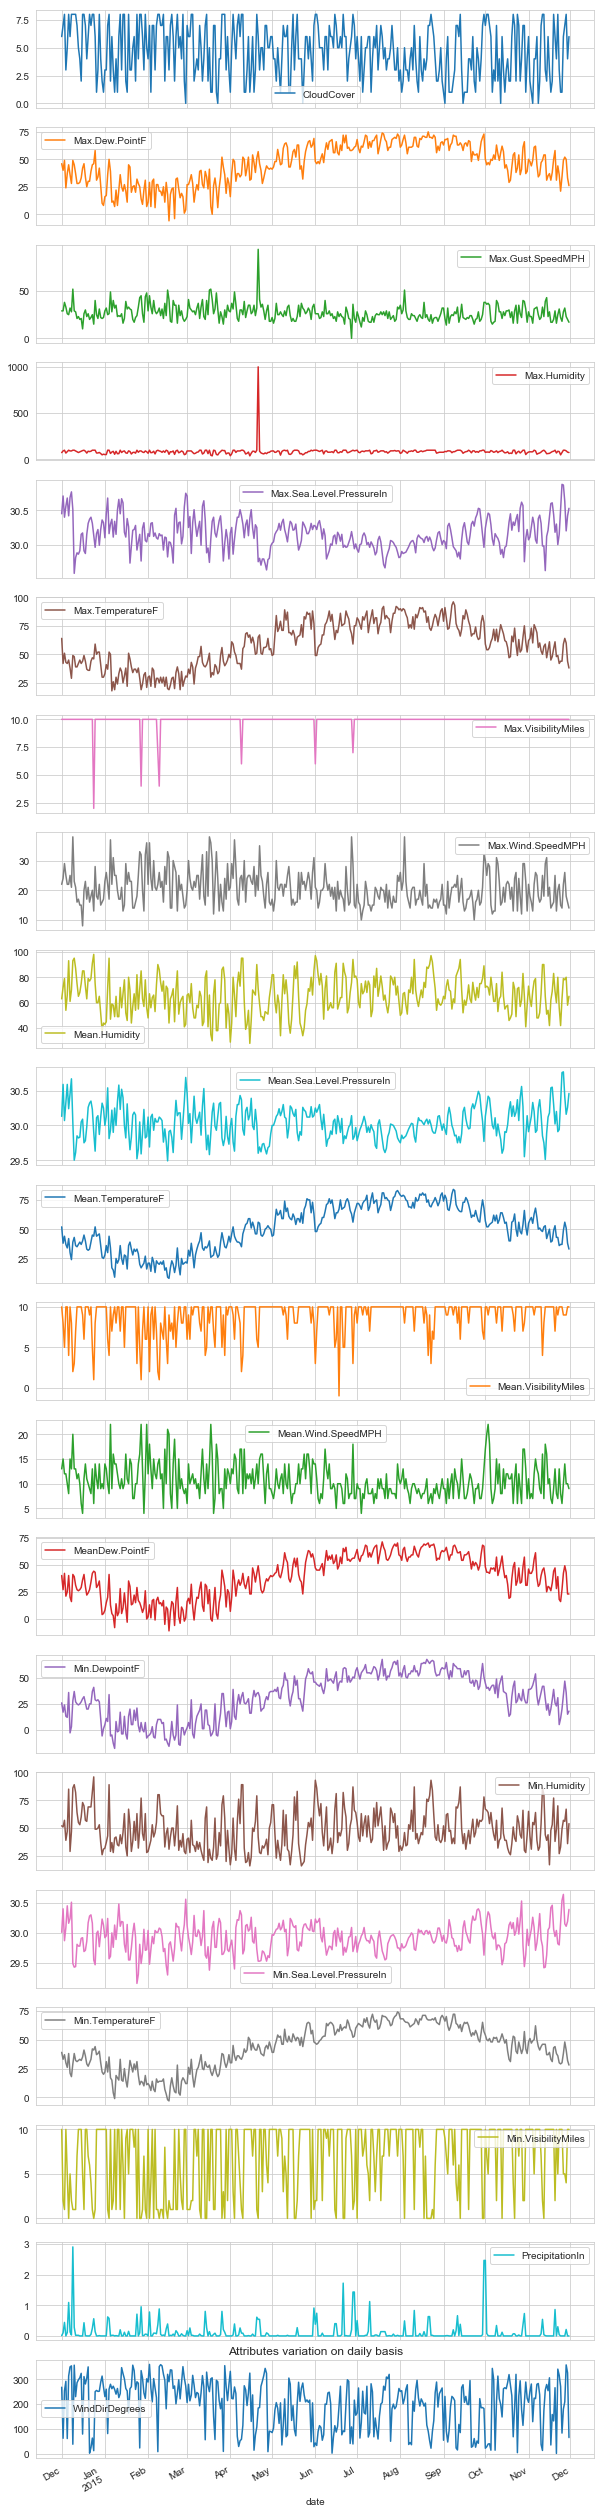

In [47]:
pivot_df1.plot(subplots=True, figsize=(10,50))
plt.title('Attributes variation on daily basis')
plt.savefig('Weather.png')
plt.show()

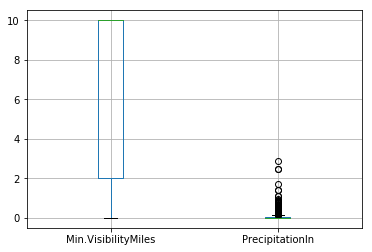

In [24]:
pivot_df1.boxplot(column = ['Min.VisibilityMiles','PrecipitationIn'] )

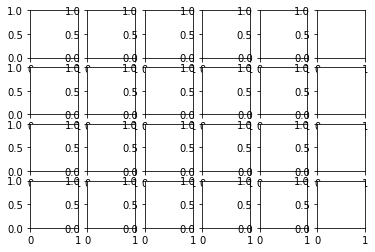

In [25]:
fig,axes = plt.subplots(nrows=4,ncols=6)
#pivot_df1.plot(kind='box', subplots=True)

In [26]:
import seaborn as sns

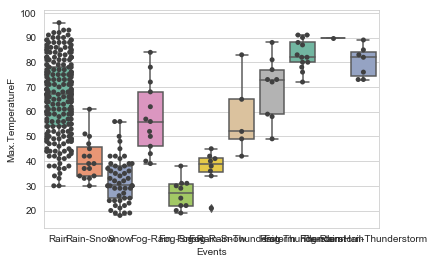

In [27]:
sns.set_style("whitegrid")
ax = sns.boxplot(y="Max.TemperatureF", x="Events", data=pivot_df1, palette="Set2")
ax = sns.swarmplot(y="Max.TemperatureF", x="Events", data=pivot_df1, color=".25")

In [28]:
pivot_df1['Events'].value_counts()

Rain                          231
Snow                           52
Rain-Snow                      16
Fog-Rain                       13
Rain-Thunderstorm              13
Fog-Snow                       10
Fog                             9
Fog-Rain-Snow                   8
Fog-Rain-Hail-Thunderstorm      7
Fog-Rain-Thunderstorm           5
Thunderstorm                    1
Name: Events, dtype: int64